# Overview

The data set is about graudate admission in UCLA. IT contains 400 records and 8 features. The size is about 12 Kb. Here we are trying to find the relationship between GRE, TOEFL and CGPA score for which admit can be given.
The dataset is taken from kaggle and below is link: https://www.kaggle.com/mohansacharya/graduate-admissions

In [27]:
import pandas as pd;
import matplotlib.pyplot as plt;
import pyspark as py
import seaborn as sns

In [4]:
df = pd.read_csv("Admission_Predict.csv",index_col='Serial No.')

### Data exploration 

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [217]:
df.describe()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.index.name= ['Id']

In [67]:
df.columns = ['GRE','TOEFL','Rating','SOP','LOR','CGPA','Research','Admit']

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE         400 non-null int64
TOEFL       400 non-null int64
Rating      400 non-null int64
SOP         400 non-null float64
LOR         400 non-null float64
CGPA        400 non-null float64
Research    400 non-null int64
Admit       400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 48.1 KB


### Visualization 

In [ ]:
# Histogram for CGPA scores 

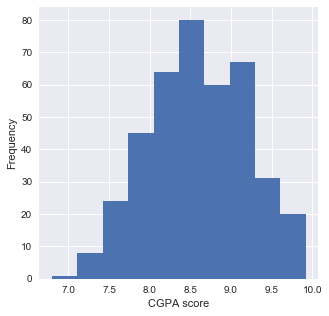

In [69]:
plt.figure(figsize=(5,5))
#df.hist()
plt.hist(df['CGPA'])
plt.xlabel('CGPA score')
plt.ylabel('Frequency')
plt.show()

In [33]:
#Frequency plot for TOEFL score 

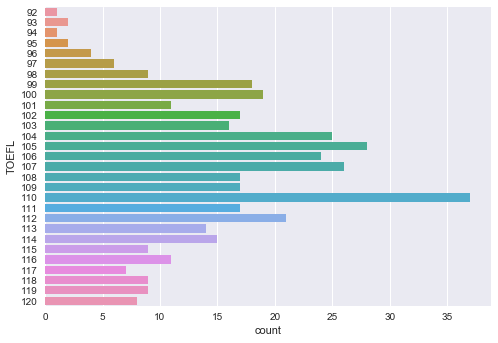

In [70]:
sns.countplot(y ='TOEFL', data=df)
plt.show()

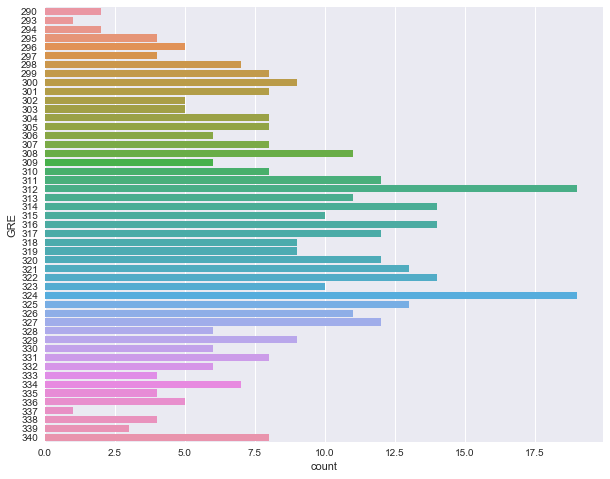

In [219]:
plt.figure(figsize=(10,8))
sns.countplot(y ='GRE', data=df)
plt.show()

In [18]:
df['CGPA'].unique()

array([ 9.65,  8.87,  8.  ,  8.67,  8.21,  9.34,  8.2 ,  7.9 ,  8.6 ,
        8.4 ,  9.  ,  9.1 ,  8.3 ,  8.7 ,  8.8 ,  8.5 ,  9.5 ,  9.7 ,
        9.8 ,  9.6 ,  7.5 ,  7.2 ,  7.3 ,  8.1 ,  9.4 ,  9.2 ,  7.8 ,
        7.7 ,  9.3 ,  8.85,  7.4 ,  7.6 ,  6.8 ,  8.92,  9.02,  8.64,
        9.22,  9.16,  9.64,  9.76,  9.45,  9.04,  8.9 ,  8.56,  8.72,
        8.22,  7.54,  7.36,  8.02,  9.36,  8.66,  8.42,  8.28,  8.14,
        8.76,  7.92,  7.66,  8.03,  7.88,  7.84,  8.96,  9.24,  8.88,
        8.46,  8.12,  8.25,  8.47,  9.05,  8.78,  9.18,  9.46,  9.38,
        8.48,  8.68,  8.34,  8.45,  8.62,  7.46,  7.28,  8.84,  9.56,
        9.48,  8.36,  9.32,  8.71,  9.35,  8.65,  9.28,  8.77,  8.16,
        9.08,  9.12,  9.15,  9.44,  9.92,  9.11,  8.26,  9.43,  9.06,
        8.75,  8.89,  8.69,  7.86,  9.01,  8.97,  8.33,  8.27,  7.98,
        8.04,  9.07,  9.13,  9.23,  8.32,  8.98,  8.94,  9.53,  8.52,
        8.43,  8.54,  9.91,  9.87,  7.65,  7.89,  9.14,  9.66,  9.78,
        9.42,  9.26,

In [ ]:
# showing the correlation between all the features of dataset
# GRE, TOEFL and CGPA score have linear relationship with admit 

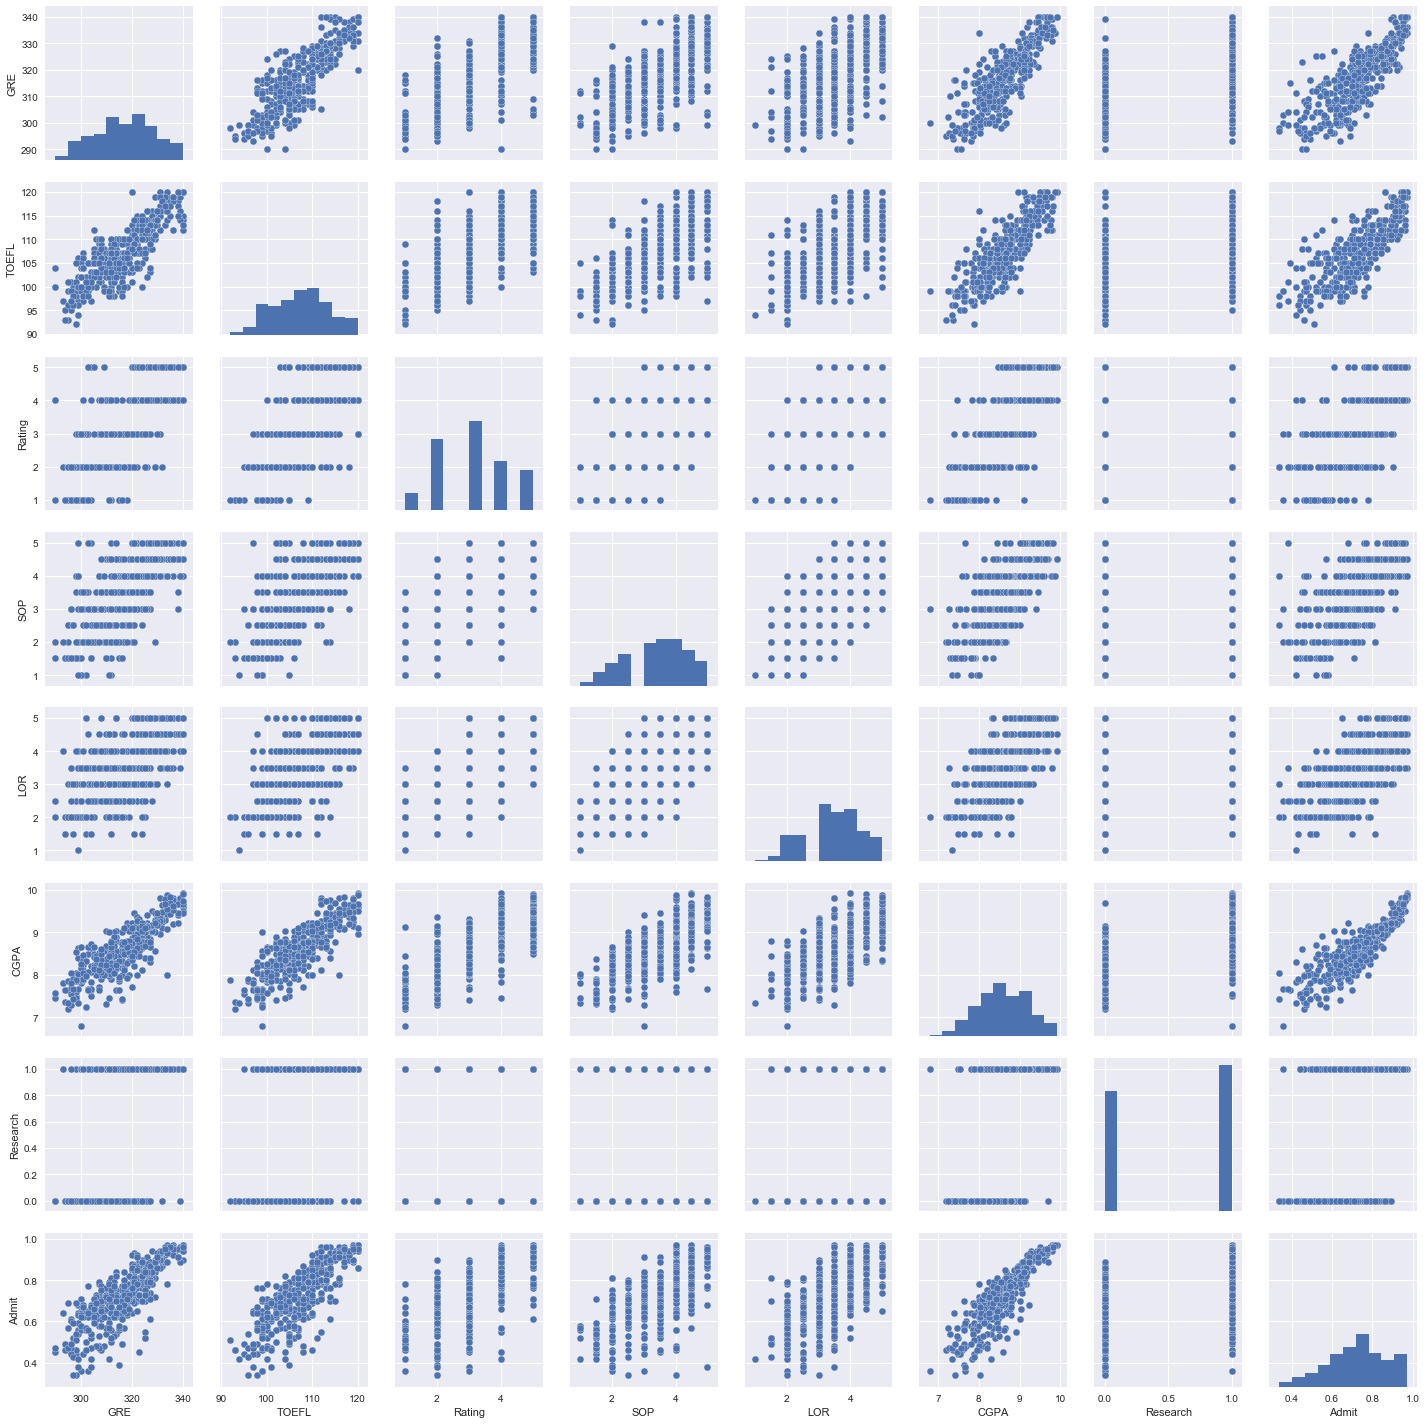

In [79]:
sns.pairplot(df)
plt.show()

#### Determining correlation matrix for data set 

In [83]:
cor_matrix = df.corr()
cor_matrix['Admit'].sort_values(ascending=False)

Admit       1.000000
CGPA        0.873289
GRE         0.802610
TOEFL       0.791594
Rating      0.711250
SOP         0.675732
LOR         0.669889
Research    0.553202
Name: Admit, dtype: float64

#### Correlation matrix show that there is strong correlation between admit and GRE,TOEFL,CGPA scores

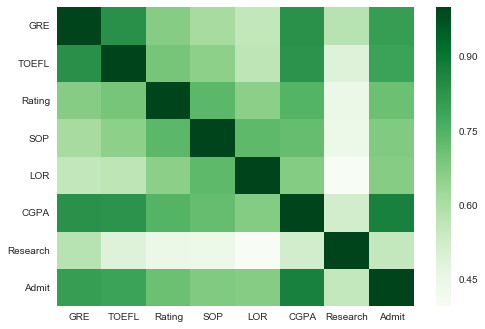

In [221]:
sns.heatmap(cor_matrix, cmap='Greens')
plt.show()

##### Creating target and features variables

##### considering only GRE,TOEFL and CGPA score for predicting the target 

In [71]:
df.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
[Id],,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [98]:
df_features=df[['GRE','TOEFL','CGPA']]

In [99]:
df_features.head()

,GRE,TOEFL,CGPA
[Id],,,
1,337,118,9.65
2,324,107,8.87
3,316,104,8.00
4,322,110,8.67
5,314,103,8.21


In [132]:
df_GRE = df_features[['GRE']]
GRE = np.array(df_GRE)
type(GRE)

numpy.ndarray

In [133]:
GRE

array([[337],
       [324],
       [316],
       [322],
       [314],
       [330],
       [321],
       [308],
       [302],
       [323],
       [325],
       [327],
       [328],
       [307],
       [311],
       [314],
       [317],
       [319],
       [318],
       [303],
       [312],
       [325],
       [328],
       [334],
       [336],
       [340],
       [322],
       [298],
       [295],
       [310],
       [300],
       [327],
       [338],
       [340],
       [331],
       [320],
       [299],
       [300],
       [304],
       [307],
       [308],
       [316],
       [313],
       [332],
       [326],
       [322],
       [329],
       [339],
       [321],
       [327],
       [313],
       [312],
       [334],
       [324],
       [322],
       [320],
       [316],
       [298],
       [300],
       [311],
       [309],
       [307],
       [304],
       [315],
       [325],
       [325],
       [327],
       [316],
       [318],
       [328],
       [332],
      

In [130]:
df_target=df[['Admit']]
target=np.array(df_target)
type(target)

numpy.ndarray

In [101]:
df_target.head()

,Admit
[Id],
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65


#####    applying machine learnig algorithms

In [171]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [134]:
X_train,X_test,y_train,y_test = train_test_split(GRE,target,test_size=0.3)

In [135]:
X_train.shape

(280, 1)

In [136]:
X_test.shape

(120, 1)

In [137]:
y_train.shape

(280, 1)

In [139]:
y_test.shape
type(y_test)

numpy.ndarray

In [140]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
y_pred = lin_reg.predict(X_test)

In [144]:
y_pred

array([[ 0.55613814],
       [ 0.78024198],
       [ 0.77005545],
       [ 0.59688429],
       [ 0.85154775],
       [ 0.59688429],
       [ 0.80061506],
       [ 0.87192083],
       [ 0.82098814],
       [ 0.64781699],
       [ 0.71912275],
       [ 0.74968237],
       [ 0.83117468],
       [ 0.6783766 ],
       [ 0.84136121],
       [ 0.75986891],
       [ 0.6783766 ],
       [ 0.62744391],
       [ 0.6783766 ],
       [ 0.88210737],
       [ 0.72930929],
       [ 0.69874968],
       [ 0.50520545],
       [ 0.85154775],
       [ 0.60707083],
       [ 0.8108016 ],
       [ 0.79042852],
       [ 0.72930929],
       [ 0.83117468],
       [ 0.90248044],
       [ 0.52557853],
       [ 0.66819006],
       [ 0.74968237],
       [ 0.58669776],
       [ 0.71912275],
       [ 0.60707083],
       [ 0.71912275],
       [ 0.77005545],
       [ 0.64781699],
       [ 0.96359967],
       [ 0.85154775],
       [ 0.5459516 ],
       [ 0.9432266 ],
       [ 0.9432266 ],
       [ 0.50520545],
       [ 0

In [143]:
y_test

array([[ 0.63],
       [ 0.91],
       [ 0.85],
       [ 0.68],
       [ 0.89],
       [ 0.47],
       [ 0.7 ],
       [ 0.86],
       [ 0.84],
       [ 0.71],
       [ 0.77],
       [ 0.65],
       [ 0.74],
       [ 0.77],
       [ 0.84],
       [ 0.64],
       [ 0.74],
       [ 0.62],
       [ 0.67],
       [ 0.9 ],
       [ 0.75],
       [ 0.84],
       [ 0.46],
       [ 0.72],
       [ 0.67],
       [ 0.73],
       [ 0.87],
       [ 0.57],
       [ 0.87],
       [ 0.78],
       [ 0.43],
       [ 0.79],
       [ 0.82],
       [ 0.62],
       [ 0.57],
       [ 0.64],
       [ 0.61],
       [ 0.74],
       [ 0.48],
       [ 0.96],
       [ 0.86],
       [ 0.38],
       [ 0.91],
       [ 0.95],
       [ 0.57],
       [ 0.75],
       [ 0.61],
       [ 0.62],
       [ 0.89],
       [ 0.7 ],
       [ 0.64],
       [ 0.93],
       [ 0.7 ],
       [ 0.79],
       [ 0.68],
       [ 0.89],
       [ 0.78],
       [ 0.61],
       [ 0.8 ],
       [ 0.97],
       [ 0.84],
       [ 0.79],
       [

In [169]:
print('Linear Regression coefficient: \n',lin_reg.coef_)

Linear Regression coefficient: 
 [[ 0.01018654]]


In [182]:
print('Intercept: \n',lin_reg.intercept_) 

Intercept: 
 [-2.49982335]


### Y_Pred = 0.010(GRE Score) - 2.499

##### GRE doesn't have a very good coefficient in predicint the admit in university

In [178]:
print("R^2 value: \n",r2_score(y_test,y_pred))

R^2 value: 
 0.630939147682


In [180]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: {}'.format(rmse));

RMSE: 0.08263292238900721


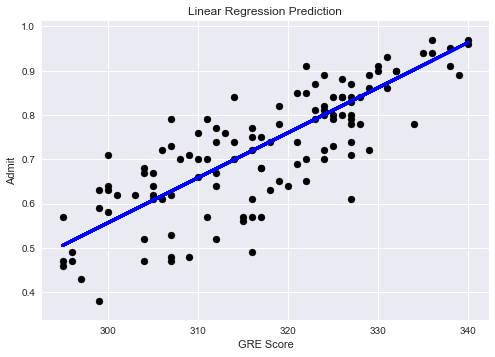

In [167]:
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred,color='blue',linewidth=3)
plt.title('Linear Regression Prediction')
plt.xlabel('GRE Score')
plt.ylabel('Admit')
plt.show()

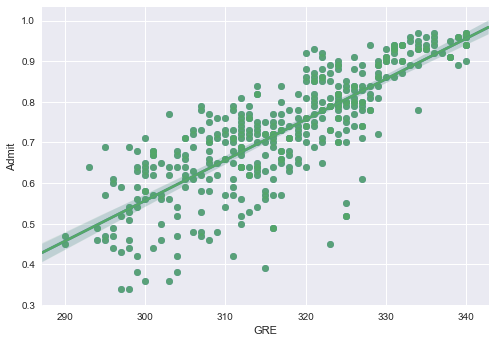

In [154]:
sns.regplot(x='GRE',y='Admit',data=df)
plt.show()

##### checking the admit prediciton for GRE score 

In [222]:
new_pred=lin_reg.predict(303)
print('Prediction on GRE score 303:',new_pred)

Prediction on GRE score 303: [[ 0.58669776]]


##### running the model with GRE, TOEFL and CGPA score 

In [196]:
df_GRE_TF_CGPA = df[['GRE','TOEFL','CGPA']]
multiple_feat=np.array(df_GRE_TF_CGPA)


In [198]:
type(multiple_feat)

numpy.ndarray

In [199]:
X_test,X_train,y_test,y_train = train_test_split(multiple_feat,target,test_size=0.3)
lin_reg_mult = linear_model.LinearRegression()

In [201]:
X_test.shape
X_train.shape
y_test.shape
y_train.shape

(120, 1)

In [202]:
lin_reg_mult.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
y_pred_mt = lin_reg_mult.predict(X_test)

In [208]:
print("Coefficients are: \n",lin_reg_mult.coef_)


Coefficients are: 
 [[ 0.00235905  0.00465461  0.11689964]]


In [209]:
print("Intercept is: \n",lin_reg_mult.intercept_)

Intercept is: 
 [-1.52433552]


### Y_pred = 0.0023(GRE_Score) + 0.0046(TOEFL_Score) + 0.1168(CGPA) - 1.524

In [210]:
print("MSE: \n",mean_squared_error(y_test,y_pred_mt))

MSE: 
 0.00467867669071


In [213]:
print("R^2 value: \n ",r2_score(y_test,y_pred_mt))

R^2 value: 
  0.773773659378


In [215]:
print("RMSE: \n",np.sqrt(mean_squared_error(y_test,y_pred_mt)))

RMSE: 
 0.0684008529969


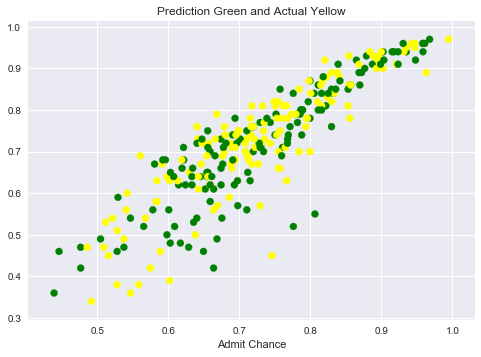

In [228]:
plt.scatter(y_pred_mt,y_test,color=['green','yellow'])
plt.xlabel('Admit Chance')
plt.title('Prediction Green and Actual Yellow')
plt.show()

#### Conclusion CGPA has most impact on deciding the admit of university , than GRE and than TOEFL